In [2]:
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot
#%matplotlib inline

n = 100

In [265]:
IA = []
JA = []
AIJ = []
f = open('matrix5_n100.mycsr', 'r')
for line in f:
    line_splited = line.split()
    if line_splited[0] == 'n':
        n = int(line_splited[2])
        nnz = int(line_splited[5])
    elif line_splited[0] == 'VECTOR':
        if line_splited[1] == 'IA':
            IA_size = int(line_splited[3])
            array_to_read = 'IA'
        elif line_splited[1] == 'JA':
            array_to_read = 'JA' 
        else:
            array_to_read = 'AIJ' 
    else:
        if(array_to_read == 'IA'):
            for item in line_splited:
                IA.append(int(item))
        elif(array_to_read == 'JA'):
            for item in line_splited:
                JA.append(int(item))
        else:
            for item in line_splited:
                AIJ.append(float(item))

In [266]:
def mult(n, IA_size, nnz, IA, JA, AIJ, vector):
    res = np.zeros(n)
    for i in range(0, IA_size):
        if(i != IA_size - 1):
            for j in range(int(IA[i]), int(IA[i + 1])):
                res[i] = res[i] + AIJ[j] * vector[JA[j]]
        else:
            for j in range(int(IA[i]), int(nnz)):
                res[i] = res[i] + AIJ[j] * vector[JA[j]] 
    return(res)

In [267]:
IA_D_inv = np.zeros(IA_size)
JA_D_inv = []
AIJ_D_inv = []
IA_L_U = np.zeros(IA_size)
IA_L_U[0] = 0
JA_L_U = []
AIJ_L_U = []
nnz_L_U = 0
nnz_D_inv = n
for i in range(0, IA_size):
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] == i):
                AIJ_D_inv.append(-1 / AIJ[j])
                JA_D_inv.append(i) 
            else:
                AIJ_L_U.append(AIJ[j])
                JA_L_U.append(JA[j])
                nnz_L_U += 1
                t += 1
        IA_L_U[i + 1] = IA_L_U[i] + t
    else:
        for j in range(IA[i], nnz):
            if(JA[j] == i):
                AIJ_D_inv.append(-1 / AIJ[j])
                JA_D_inv.append(i) 
            else:
                AIJ_L_U.append(AIJ[j])
                JA_L_U.append(JA[j])
                nnz_L_U += 1
    IA_D_inv[i] = i

Норма отклонения полученного решения(1, 2, 3):
4.559629430566652e+217
2.7690410767068155e+219
inf
Не сошелся
Коэффицент наклона:
0.5078737293198106
Норма матрицы, расчитанная из графика:
1.24678315489


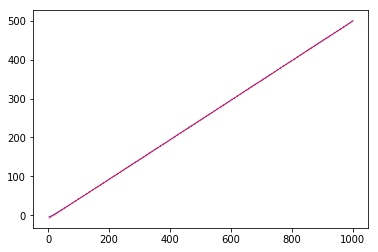

In [268]:
#Метод Якоби
x_Jacobi = []
y_Jacobi = []
x_1 = np.zeros(n)
x_1[1] = 0.1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 1000):
    x_2 = mult(n, IA_size, nnz_L_U, IA_L_U, JA_L_U, AIJ_L_U, x_1)
    x_1 = mult(n, IA_size, nnz_D_inv, IA_D_inv, JA_D_inv, AIJ_D_inv, x_2)
    i += 1
    x_Jacobi.append(i)
    y_Jacobi.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 1000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Jacobi, y_Jacobi, 1)
y_Jacobi_linear = []
x_Jacobi_linear = []
for item in x_Jacobi:
    x_Jacobi_linear.append(item)
    y_Jacobi_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Jacobi, y_Jacobi, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Jacobi_linear, y_Jacobi_linear, s = 0.01, c = 'r')
plt.pyplot.show()

In [269]:
IA_U = np.zeros(IA_size)
JA_U = []
AIJ_U = []
IA_U[0] = 0
IA_L_D_inv = np.zeros(IA_size)
JA_L_D_inv = []
AIJ_L_D_inv = []
IA_L_D_inv[0] = 0
nnz_U = 0
nnz_L_D_inv = 0
for i in range(0, IA_size):
    t_U = 0
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] > i):
                AIJ_U.append(AIJ[j])
                JA_U.append(JA[j]) 
                t_U += 1
                nnz_U += 1
#            elif(JA[j] < i):
#                a = 0
#                for k in range(JA[j], i):
#                    if JA[j] in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: IA[i + 1]]:
#                        a += AIJ[JA.index(k, IA[i], IA[i + 1])] * AIJ_L_D_inv[JA_L_D_inv.index(JA[j], int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
#                a /= -AIJ[JA.index(i, IA[i], IA[i + 1])]
#                if(a != 0):
#                    AIJ_L_D_inv.append(a)
#                    JA_L_D_inv.append(JA[j])
#                    nnz_L_D_inv += 1
#                    t += 1
#            else:
#                a = 1 / AIJ[JA.index(i, IA[i], IA[i + 1])]
#                AIJ_L_D_inv.append(a)
#                JA_L_D_inv.append(i)
#                nnz_L_D_inv += 1
#                t += 1
            elif(JA[j] == i):
                for Q in range (0, i):
                    a = 0
                    for k in range(Q, i):
                        if Q in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: IA[i + 1]]:
                            a += AIJ[JA.index(k, IA[i], IA[i + 1])] * AIJ_L_D_inv[JA_L_D_inv.index(Q, int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
                    a /= -AIJ[JA.index(i, IA[i], IA[i + 1])]
                    if(a != 0):
                        AIJ_L_D_inv.append(a)
                        JA_L_D_inv.append(Q)
                        nnz_L_D_inv += 1
                        t += 1
                a = 1 / AIJ[JA.index(i, IA[i], IA[i + 1])]
                AIJ_L_D_inv.append(a)
                JA_L_D_inv.append(i)
                nnz_L_D_inv += 1
                t += 1
        IA_U[i + 1] = IA_U[i] + t_U
        IA_L_D_inv[i + 1] = IA_L_D_inv[i] + t
    else:
        for j in range(IA[i], nnz):
            if(JA[j] > i):
                AIJ_U.append(AIJ[j])
                JA_U.append(JA[j]) 
                t_U += 1
                nnz_U += 1
 #           elif(JA[j] < i):
 #               a = 0
 #               for k in range(JA[j], i):
 #                   if JA[j] in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: nnz]:
 #                       a += AIJ[JA.index(k, IA[i], nnz)] * AIJ_L_D_inv[JA_L_D_inv.index(JA[j], int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
 #               a /= -AIJ[JA.index(i, IA[i], nnz)]
 #               if(a != 0):
 #                   AIJ_L_D_inv.append(a)
 #                   JA_L_D_inv.append(JA[j])
 #                   nnz_L_D_inv += 1
 #           else:
 #               a = 1 / AIJ[JA.index(i, IA[i], nnz)]
 #               AIJ_L_D_inv.append(a)
 #               JA_L_D_inv.append(i)
 #               nnz_L_D_inv += 1
            elif(JA[j] == i):
                for Q in range (0, i):
                    a = 0
                    for k in range(Q, i):
                        if Q in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: nnz]:
                            a += AIJ[JA.index(k, IA[i], nnz)] * AIJ_L_D_inv[JA_L_D_inv.index(Q, int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
                    a /= -AIJ[JA.index(i, IA[i], nnz)]
                    if(a != 0):
                        AIJ_L_D_inv.append(a)
                        JA_L_D_inv.append(Q)
                        nnz_L_D_inv += 1
                        t += 1
                a = 1 / AIJ[JA.index(i, IA[i], nnz)]
                AIJ_L_D_inv.append(a)
                JA_L_D_inv.append(i)
                nnz_L_D_inv += 1
                t += 1
#print(IA_L_D_inv)
#print(JA_L_D_inv)
#print(AIJ_L_D_inv)   

Норма отклонения полученного решения(1, 2, 3):
8.917405647504895e-08
1.245748122921122e-06
2.5742399747809317e-07
Не сошелся
Коэффицент наклона:
-0.005117763481940722
Норма матрицы, расчитанная из графика:
0.997779851743


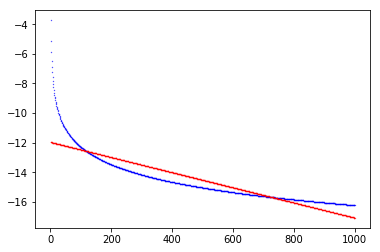

In [270]:
#Метод Зейделя
x_Zeydel = []
y_Zeydel = []
x_1 = np.zeros(n)
x_1[1] = 0.01
i = 0
f = np.zeros(n)
nev = np.zeros(n)
#f[0] = 6.0015999999999998
#f[1] = -4.0
#f[2] = 1.0
#f[3] = 0.1
#f[4] = 0.0
f_1 = np.zeros(n)
f_1 = mult(n, IA_size, nnz_L_D_inv, IA_L_D_inv, JA_L_D_inv, AIJ_L_D_inv, f)
nev = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
nev -= f
while (np.linalg.norm(nev, np.inf) > 0.0000000001 and i < 1000):
    #print(x_1)
    x_2 = mult(n, IA_size, nnz_U, IA_U, JA_U, AIJ_U, x_1)
    #print(x_2)
    x_1 = -mult(n, IA_size, nnz_L_D_inv, IA_L_D_inv, JA_L_D_inv, AIJ_L_D_inv, x_2)
    #print(x_1)
    x_1 += f_1
    #print(np.linalg.norm(nev, np.inf))
    
    i += 1
    
    nev = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
    nev = nev - f
    #print(np.linalg.norm(nev, np.inf))
    if(np.linalg.norm(nev, np.inf) != 0):
        y_Zeydel.append(math.log(np.linalg.norm(nev, np.inf)))
        x_Zeydel.append(i)
    else:
        break
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(nev, np.inf))
print(np.linalg.norm(nev, 1))
print(np.linalg.norm(nev))
if i != 1000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
#print(x_1)
#print(f_1)
k = np.polyfit(x_Zeydel, y_Zeydel, 1)
y_Zeydel_linear = []
x_Zeydel_linear = []
for item in x_Zeydel:
    x_Zeydel_linear.append(item)
    y_Zeydel_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'b')
plot = plt.pyplot.scatter(x_Zeydel_linear, y_Zeydel_linear, s = 0.1, c = 'r')
plt.pyplot.show()

In [271]:
#Расчет оптимального тау для метода простых итераций
A = np.zeros((n, n))
for i in range(0, IA_size):
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            A[JA[j], i] = AIJ[j]
    else:
        for j in range(IA[i], nnz):
            A[JA[j], i] = AIJ[j]
Q = np.linalg.eig(A)[0]
L_min = min(Q)
L_max = max(Q)
T_opt = 2 / (L_min + L_max)
print(L_min, L_max, T_opt)

(4.634902012576396e-06, 15.992306143853462, 0.12506010092405423)


In [272]:
IA_Simple = IA
JA_Simple = JA
AIJ_Simple = []
nnz_Simple = nnz
for i in range(0, IA_size):
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] == i):
                AIJ_Simple.append(1 - T_opt * AIJ[j])
            else:
                AIJ_Simple.append(- T_opt * AIJ[j])
    else:
        for j in range(IA[i], nnz):
            if(JA[j] == i):
                AIJ_Simple.append(1 - T_opt * AIJ[j])
            else:
                AIJ_Simple.append(- T_opt * AIJ[j])

Норма отклонения полученного решения(1, 2, 3):
0.000357348922616444
0.01190154434664529
0.0014192105219835098
Не сошелся
Коэффицент наклона:
-0.00019173056742533554
Норма матрицы, расчитанная из графика:
0.999916735939


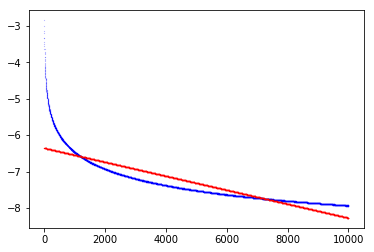

In [273]:
#Метод простых итераций
x_Simple = []
y_Simple = []
x_1 = np.zeros(n)
x_1[1] = 0.1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 10000):
    x_2 = mult(n, IA_size, nnz_Simple, IA_Simple, JA_Simple, AIJ_Simple, x_1)
    x_1 = x_2
    i += 1
    x_Simple.append(i)
    y_Simple.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 10000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Simple, y_Simple, 1)
y_Simple_linear = []
x_Simple_linear = []
for item in x_Simple:
    x_Simple_linear.append(item)
    y_Simple_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Simple_linear, y_Simple_linear, s = 0.01, c = 'r')
plt.pyplot.show()

Норма отклонения полученного решения(1, 2, 3):
9.16770208166649e-11
2.95652259629363e-09
3.8014368040093506e-10
Число итериций:
336
Коэффицент наклона:
-0.04170327758693134


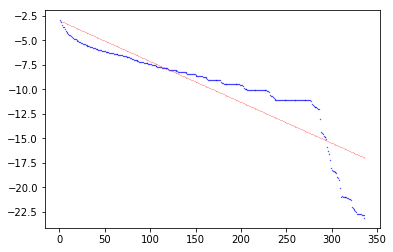

In [274]:
# Метод сопряженных градиентов
x_Gradient = []
y_Gradient = []
x_1 = np.zeros(n)
x_1[1] = 0.1
r_1 = r_2 = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
s = r_1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 5000):
    t = mult(n, IA_size, nnz, IA, JA, AIJ, s)
    a = np.matmul(r_1, r_1) / np.matmul(t, s)
    r_2 = r_1 - a * t
    x_1 = x_1 - a * s
    b = np.matmul(r_2, r_2) / np.matmul(r_1, r_1)
    s = r_2 + b * s
    r_1 = r_2
    i += 1
    x_Gradient.append(i)
    y_Gradient.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 5000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Gradient, y_Gradient, 1)
y_Gradient_linear = []
x_Gradient_linear = []
for item in x_Gradient:
    x_Gradient_linear.append(item)
    y_Gradient_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 0.1, c = 'b')
plot = plt.pyplot.scatter(x_Gradient_linear, y_Gradient_linear, s = 0.01, c = 'r')
plt.pyplot.show()

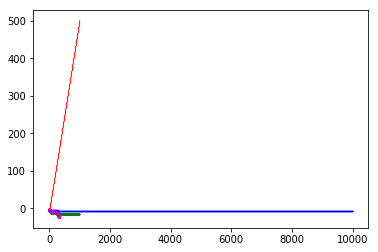

In [275]:
plot = plt.pyplot.scatter(x_Jacobi, y_Jacobi, s = 0.01, c = 'r')
plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'g')
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 3, c = 'm')
plt.pyplot.show()

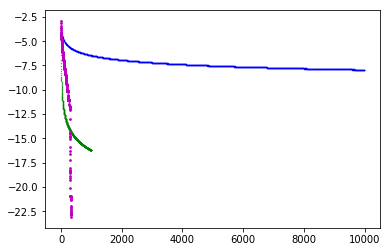

In [276]:
plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'g')
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 3, c = 'm')
plt.pyplot.show()

n = 1000

In [277]:
IA = []
JA = []
AIJ = []
f = open('matrix5_n1000.mycsr', 'r')
for line in f:
    line_splited = line.split()
    if line_splited[0] == 'n':
        n = int(line_splited[2])
        nnz = int(line_splited[5])
    elif line_splited[0] == 'VECTOR':
        if line_splited[1] == 'IA':
            IA_size = int(line_splited[3])
            array_to_read = 'IA'
        elif line_splited[1] == 'JA':
            array_to_read = 'JA' 
        else:
            array_to_read = 'AIJ' 
    else:
        if(array_to_read == 'IA'):
            for item in line_splited:
                IA.append(int(item))
        elif(array_to_read == 'JA'):
            for item in line_splited:
                JA.append(int(item))
        else:
            for item in line_splited:
                AIJ.append(float(item))

In [278]:
def mult(n, IA_size, nnz, IA, JA, AIJ, vector):
    res = np.zeros(n)
    for i in range(0, IA_size):
        if(i != IA_size - 1):
            for j in range(int(IA[i]), int(IA[i + 1])):
                res[i] = res[i] + AIJ[j] * vector[JA[j]]
        else:
            for j in range(int(IA[i]), int(nnz)):
                res[i] = res[i] + AIJ[j] * vector[JA[j]] 
    return(res)

In [279]:
IA_D_inv = np.zeros(IA_size)
JA_D_inv = []
AIJ_D_inv = []
IA_L_U = np.zeros(IA_size)
IA_L_U[0] = 0
JA_L_U = []
AIJ_L_U = []
nnz_L_U = 0
nnz_D_inv = n
for i in range(0, IA_size):
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] == i):
                AIJ_D_inv.append(-1 / AIJ[j])
                JA_D_inv.append(i) 
            else:
                AIJ_L_U.append(AIJ[j])
                JA_L_U.append(JA[j])
                nnz_L_U += 1
                t += 1
        IA_L_U[i + 1] = IA_L_U[i] + t
    else:
        for j in range(IA[i], nnz):
            if(JA[j] == i):
                AIJ_D_inv.append(-1 / AIJ[j])
                JA_D_inv.append(i) 
            else:
                AIJ_L_U.append(AIJ[j])
                JA_L_U.append(JA[j])
                nnz_L_U += 1
    IA_D_inv[i] = i

Норма отклонения полученного решения(1, 2, 3):
4.567664119640875e+217
3.0140547185257745e+219
inf
Не сошелся
Коэффицент наклона:
0.507874495872066
Норма матрицы, расчитанная из графика:
1.24678356996


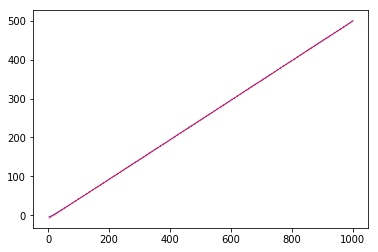

In [280]:
#Метод Якоби
x_Jacobi = []
y_Jacobi = []
x_1 = np.zeros(n)
x_1[1] = 0.1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 1000):
    x_2 = mult(n, IA_size, nnz_L_U, IA_L_U, JA_L_U, AIJ_L_U, x_1)
    x_1 = mult(n, IA_size, nnz_D_inv, IA_D_inv, JA_D_inv, AIJ_D_inv, x_2)
    i += 1
    x_Jacobi.append(i)
    y_Jacobi.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 1000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Jacobi, y_Jacobi, 1)
y_Jacobi_linear = []
x_Jacobi_linear = []
for item in x_Jacobi:
    x_Jacobi_linear.append(item)
    y_Jacobi_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Jacobi, y_Jacobi, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Jacobi_linear, y_Jacobi_linear, s = 0.01, c = 'r')
plt.pyplot.show()

In [281]:
IA_U = np.zeros(IA_size)
JA_U = []
AIJ_U = []
IA_U[0] = 0
IA_L_D_inv = np.zeros(IA_size)
JA_L_D_inv = []
AIJ_L_D_inv = []
IA_L_D_inv[0] = 0
nnz_U = 0
nnz_L_D_inv = 0
for i in range(0, IA_size):
    t_U = 0
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] > i):
                AIJ_U.append(AIJ[j])
                JA_U.append(JA[j]) 
                t_U += 1
                nnz_U += 1
#            elif(JA[j] < i):
#                a = 0
#                for k in range(JA[j], i):
#                    if JA[j] in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: IA[i + 1]]:
#                        a += AIJ[JA.index(k, IA[i], IA[i + 1])] * AIJ_L_D_inv[JA_L_D_inv.index(JA[j], int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
#                a /= -AIJ[JA.index(i, IA[i], IA[i + 1])]
#                if(a != 0):
#                    AIJ_L_D_inv.append(a)
#                    JA_L_D_inv.append(JA[j])
#                    nnz_L_D_inv += 1
#                    t += 1
#            else:
#                a = 1 / AIJ[JA.index(i, IA[i], IA[i + 1])]
#                AIJ_L_D_inv.append(a)
#                JA_L_D_inv.append(i)
#                nnz_L_D_inv += 1
#                t += 1
            elif(JA[j] == i):
                for Q in range (0, i):
                    a = 0
                    for k in range(Q, i):
                        if Q in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: IA[i + 1]]:
                            a += AIJ[JA.index(k, IA[i], IA[i + 1])] * AIJ_L_D_inv[JA_L_D_inv.index(Q, int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
                    a /= -AIJ[JA.index(i, IA[i], IA[i + 1])]
                    if(a != 0):
                        AIJ_L_D_inv.append(a)
                        JA_L_D_inv.append(Q)
                        nnz_L_D_inv += 1
                        t += 1
                a = 1 / AIJ[JA.index(i, IA[i], IA[i + 1])]
                AIJ_L_D_inv.append(a)
                JA_L_D_inv.append(i)
                nnz_L_D_inv += 1
                t += 1
        IA_U[i + 1] = IA_U[i] + t_U
        IA_L_D_inv[i + 1] = IA_L_D_inv[i] + t
    else:
        for j in range(IA[i], nnz):
            if(JA[j] > i):
                AIJ_U.append(AIJ[j])
                JA_U.append(JA[j]) 
                t_U += 1
                nnz_U += 1
 #           elif(JA[j] < i):
 #               a = 0
 #               for k in range(JA[j], i):
 #                   if JA[j] in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: nnz]:
 #                       a += AIJ[JA.index(k, IA[i], nnz)] * AIJ_L_D_inv[JA_L_D_inv.index(JA[j], int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
 #               a /= -AIJ[JA.index(i, IA[i], nnz)]
 #               if(a != 0):
 #                   AIJ_L_D_inv.append(a)
 #                   JA_L_D_inv.append(JA[j])
 #                   nnz_L_D_inv += 1
 #           else:
 #               a = 1 / AIJ[JA.index(i, IA[i], nnz)]
 #               AIJ_L_D_inv.append(a)
 #               JA_L_D_inv.append(i)
 #               nnz_L_D_inv += 1
            elif(JA[j] == i):
                for Q in range (0, i):
                    a = 0
                    for k in range(Q, i):
                        if Q in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: nnz]:
                            a += AIJ[JA.index(k, IA[i], nnz)] * AIJ_L_D_inv[JA_L_D_inv.index(Q, int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
                    a /= -AIJ[JA.index(i, IA[i], nnz)]
                    if(a != 0):
                        AIJ_L_D_inv.append(a)
                        JA_L_D_inv.append(Q)
                        nnz_L_D_inv += 1
                        t += 1
                a = 1 / AIJ[JA.index(i, IA[i], nnz)]
                AIJ_L_D_inv.append(a)
                JA_L_D_inv.append(i)
                nnz_L_D_inv += 1
                t += 1
#print(IA_L_D_inv)
#print(JA_L_D_inv)
#print(AIJ_L_D_inv)   

Норма отклонения полученного решения(1, 2, 3):
0.00040128315688819916
0.005605876155375998
0.001158408210293737
Не сошелся
Коэффицент наклона:
-0.00511776379443152
Норма матрицы, расчитанная из графика:
0.997779851608


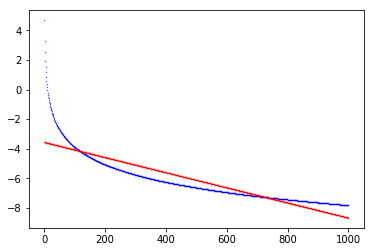

In [282]:
#Метод Зейделя
x_Zeydel = []
y_Zeydel = []
x_1 = np.zeros(n)
x_1[1] = 45
i = 0
f = np.zeros(n)
nev = np.zeros(n)
#f[0] = 6.0015999999999998
#f[1] = -4.0
#f[2] = 1.0
#f[3] = 0.1
#f[4] = 0.0
f_1 = np.zeros(n)
f_1 = mult(n, IA_size, nnz_L_D_inv, IA_L_D_inv, JA_L_D_inv, AIJ_L_D_inv, f)
nev = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
nev -= f
while (np.linalg.norm(nev, np.inf) > 0.0000000001 and i < 1000):
    #print(x_1)
    x_2 = mult(n, IA_size, nnz_U, IA_U, JA_U, AIJ_U, x_1)
    #print(x_2)
    x_1 = -mult(n, IA_size, nnz_L_D_inv, IA_L_D_inv, JA_L_D_inv, AIJ_L_D_inv, x_2)
    #print(x_1)
    x_1 += f_1
    #print(np.linalg.norm(nev, np.inf))
    
    i += 1
    
    nev = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
    nev = nev - f
    #print(np.linalg.norm(nev, np.inf))
    if(np.linalg.norm(nev, np.inf) != 0):
        y_Zeydel.append(math.log(np.linalg.norm(nev, np.inf)))
        x_Zeydel.append(i)
    else:
        break
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(nev, np.inf))
print(np.linalg.norm(nev, 1))
print(np.linalg.norm(nev))
if i != 1000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
#print(x_1)
#print(f_1)
k = np.polyfit(x_Zeydel, y_Zeydel, 1)
y_Zeydel_linear = []
x_Zeydel_linear = []
for item in x_Zeydel:
    x_Zeydel_linear.append(item)
    y_Zeydel_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'b')
plot = plt.pyplot.scatter(x_Zeydel_linear, y_Zeydel_linear, s = 0.1, c = 'r')
plt.pyplot.show()

In [283]:
#Расчет оптимального тау для метода простых итераций
A = np.zeros((n, n))
for i in range(0, IA_size):
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            A[JA[j], i] = AIJ[j]
    else:
        for j in range(IA[i], nnz):
            A[JA[j], i] = AIJ[j]
Q = np.linalg.eig(A)[0]
L_min = min(Q)
L_max = max(Q)
T_opt = 2 / (L_min + L_max)
print(L_min, L_max, T_opt)

(4.975800205329855e-10, 15.999921247097584, 0.12500061525619108)


In [284]:
IA_Simple = IA
JA_Simple = JA
AIJ_Simple = []
nnz_Simple = nnz
for i in range(0, IA_size):
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] == i):
                AIJ_Simple.append(1 - T_opt * AIJ[j])
            else:
                AIJ_Simple.append(- T_opt * AIJ[j])
    else:
        for j in range(IA[i], nnz):
            if(JA[j] == i):
                AIJ_Simple.append(1 - T_opt * AIJ[j])
            else:
                AIJ_Simple.append(- T_opt * AIJ[j])

Норма отклонения полученного решения(1, 2, 3):
0.00030262769904350524
0.006870421567614712
0.0010771202888723783
Не сошелся
Коэффицент наклона:
-0.0002092930119556627
Норма матрицы, расчитанная из графика:
0.999909109331


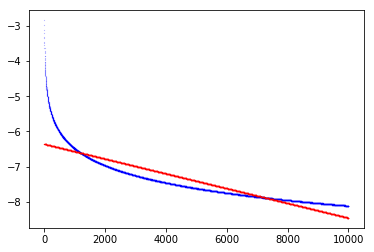

In [285]:
#Метод простых итераций
x_Simple = []
y_Simple = []
x_1 = np.zeros(n)
x_1[1] = 0.1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 10000):
    x_2 = mult(n, IA_size, nnz_Simple, IA_Simple, JA_Simple, AIJ_Simple, x_1)
    x_1 = x_2
    i += 1
    x_Simple.append(i)
    y_Simple.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 10000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Simple, y_Simple, 1)
y_Simple_linear = []
x_Simple_linear = []
for item in x_Simple:
    x_Simple_linear.append(item)
    y_Simple_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Simple_linear, y_Simple_linear, s = 0.01, c = 'r')
plt.pyplot.show()

Норма отклонения полученного решения(1, 2, 3):
2.09357904224214e-06
0.0002723434950115495
1.8304563032018973e-05
Не сошелся
Коэффицент наклона:
-0.0009604480933651169


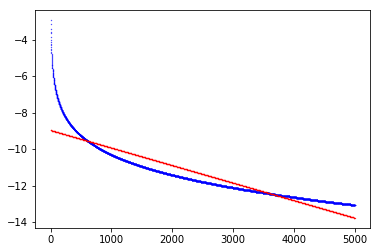

In [286]:
# Метод сопряженных градиентов
x_Gradient = []
y_Gradient = []
x_1 = np.zeros(n)
x_1[1] = 0.1
r_1 = r_2 = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
s = r_1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 5000):
    t = mult(n, IA_size, nnz, IA, JA, AIJ, s)
    a = np.matmul(r_1, r_1) / np.matmul(t, s)
    r_2 = r_1 - a * t
    x_1 = x_1 - a * s
    b = np.matmul(r_2, r_2) / np.matmul(r_1, r_1)
    s = r_2 + b * s
    r_1 = r_2
    i += 1
    x_Gradient.append(i)
    y_Gradient.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 5000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Gradient, y_Gradient, 1)
y_Gradient_linear = []
x_Gradient_linear = []
for item in x_Gradient:
    x_Gradient_linear.append(item)
    y_Gradient_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 0.1, c = 'b')
plot = plt.pyplot.scatter(x_Gradient_linear, y_Gradient_linear, s = 0.01, c = 'r')
plt.pyplot.show()

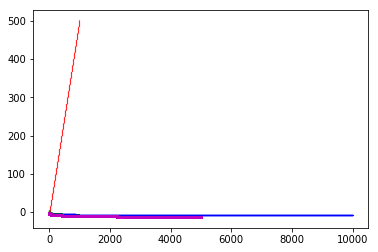

In [287]:
plot = plt.pyplot.scatter(x_Jacobi, y_Jacobi, s = 0.01, c = 'r')
plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'g')
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 3, c = 'm')
plt.pyplot.show()

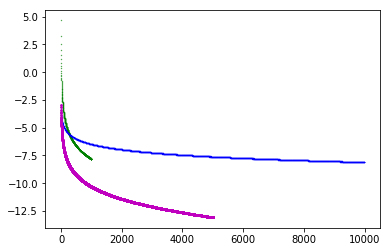

In [288]:
plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'g')
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 3, c = 'm')
plt.pyplot.show()

n = 10000

In [4]:
IA = []
JA = []
AIJ = []
f = open('matrix5_n10000.mycsr', 'r')
for line in f:
    line_splited = line.split()
    if line_splited[0] == 'n':
        n = int(line_splited[2])
        nnz = int(line_splited[5])
    elif line_splited[0] == 'VECTOR':
        if line_splited[1] == 'IA':
            IA_size = int(line_splited[3])
            array_to_read = 'IA'
        elif line_splited[1] == 'JA':
            array_to_read = 'JA' 
        else:
            array_to_read = 'AIJ' 
    else:
        if(array_to_read == 'IA'):
            for item in line_splited:
                IA.append(int(item))
        elif(array_to_read == 'JA'):
            for item in line_splited:
                JA.append(int(item))
        else:
            for item in line_splited:
                AIJ.append(float(item))

In [5]:
def mult(n, IA_size, nnz, IA, JA, AIJ, vector):
    res = np.zeros(n)
    for i in range(0, IA_size):
        if(i != IA_size - 1):
            for j in range(int(IA[i]), int(IA[i + 1])):
                res[i] = res[i] + AIJ[j] * vector[JA[j]]
        else:
            for j in range(int(IA[i]), int(nnz)):
                res[i] = res[i] + AIJ[j] * vector[JA[j]] 
    return(res)

In [11]:
IA_D_inv = np.zeros(IA_size)
JA_D_inv = []
AIJ_D_inv = []
IA_L_U = np.zeros(IA_size)
IA_L_U[0] = 0
JA_L_U = []
AIJ_L_U = []
nnz_L_U = 0
nnz_D_inv = n
for i in range(0, IA_size):
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] == i):
                AIJ_D_inv.append(-1 / AIJ[j])
                JA_D_inv.append(i) 
            else:
                AIJ_L_U.append(AIJ[j])
                JA_L_U.append(JA[j])
                nnz_L_U += 1
                t += 1
        IA_L_U[i + 1] = IA_L_U[i] + t
    else:
        for j in range(IA[i], nnz):
            if(JA[j] == i):
                AIJ_D_inv.append(-1 / AIJ[j])
                JA_D_inv.append(i) 
            else:
                AIJ_L_U.append(AIJ[j])
                JA_L_U.append(JA[j])
                nnz_L_U += 1
    IA_D_inv[i] = i

Норма отклонения полученного решения(1, 2, 3):
4.567664120402318e+217
3.014054719028227e+219
inf
Не сошелся
Коэффицент наклона:
0.5078744958722328
Норма матрицы, расчитанная из графика:
1.24678356996


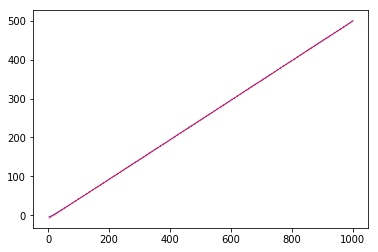

In [12]:
#Метод Якоби
x_Jacobi = []
y_Jacobi = []
x_1 = np.zeros(n)
x_1[1] = 0.1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 1000):
    x_2 = mult(n, IA_size, nnz_L_U, IA_L_U, JA_L_U, AIJ_L_U, x_1)
    x_1 = mult(n, IA_size, nnz_D_inv, IA_D_inv, JA_D_inv, AIJ_D_inv, x_2)
    i += 1
    x_Jacobi.append(i)
    y_Jacobi.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 1000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Jacobi, y_Jacobi, 1)
y_Jacobi_linear = []
x_Jacobi_linear = []
for item in x_Jacobi:
    x_Jacobi_linear.append(item)
    y_Jacobi_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Jacobi, y_Jacobi, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Jacobi_linear, y_Jacobi_linear, s = 0.01, c = 'r')
plt.pyplot.show()

In [293]:
IA_U = np.zeros(IA_size)
JA_U = []
AIJ_U = []
IA_U[0] = 0
IA_L_D_inv = np.zeros(IA_size)
JA_L_D_inv = []
AIJ_L_D_inv = []
IA_L_D_inv[0] = 0
nnz_U = 0
nnz_L_D_inv = 0
for i in range(0, IA_size):
    t_U = 0
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] > i):
                AIJ_U.append(AIJ[j])
                JA_U.append(JA[j]) 
                t_U += 1
                nnz_U += 1
#            elif(JA[j] < i):
#                a = 0
#                for k in range(JA[j], i):
#                    if JA[j] in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: IA[i + 1]]:
#                        a += AIJ[JA.index(k, IA[i], IA[i + 1])] * AIJ_L_D_inv[JA_L_D_inv.index(JA[j], int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
#                a /= -AIJ[JA.index(i, IA[i], IA[i + 1])]
#                if(a != 0):
#                    AIJ_L_D_inv.append(a)
#                    JA_L_D_inv.append(JA[j])
#                    nnz_L_D_inv += 1
#                    t += 1
#            else:
#                a = 1 / AIJ[JA.index(i, IA[i], IA[i + 1])]
#                AIJ_L_D_inv.append(a)
#                JA_L_D_inv.append(i)
#                nnz_L_D_inv += 1
#                t += 1
            elif(JA[j] == i):
                for Q in range (0, i):
                    a = 0
                    for k in range(Q, i):
                        if Q in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: IA[i + 1]]:
                            a += AIJ[JA.index(k, IA[i], IA[i + 1])] * AIJ_L_D_inv[JA_L_D_inv.index(Q, int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
                    a /= -AIJ[JA.index(i, IA[i], IA[i + 1])]
                    if(a != 0):
                        AIJ_L_D_inv.append(a)
                        JA_L_D_inv.append(Q)
                        nnz_L_D_inv += 1
                        t += 1
                a = 1 / AIJ[JA.index(i, IA[i], IA[i + 1])]
                AIJ_L_D_inv.append(a)
                JA_L_D_inv.append(i)
                nnz_L_D_inv += 1
                t += 1
        IA_U[i + 1] = IA_U[i] + t_U
        IA_L_D_inv[i + 1] = IA_L_D_inv[i] + t
    else:
        for j in range(IA[i], nnz):
            if(JA[j] > i):
                AIJ_U.append(AIJ[j])
                JA_U.append(JA[j]) 
                t_U += 1
                nnz_U += 1
 #           elif(JA[j] < i):
 #               a = 0
 #               for k in range(JA[j], i):
 #                   if JA[j] in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: nnz]:
 #                       a += AIJ[JA.index(k, IA[i], nnz)] * AIJ_L_D_inv[JA_L_D_inv.index(JA[j], int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
 #               a /= -AIJ[JA.index(i, IA[i], nnz)]
 #               if(a != 0):
 #                   AIJ_L_D_inv.append(a)
 #                   JA_L_D_inv.append(JA[j])
 #                   nnz_L_D_inv += 1
 #           else:
 #               a = 1 / AIJ[JA.index(i, IA[i], nnz)]
 #               AIJ_L_D_inv.append(a)
 #               JA_L_D_inv.append(i)
 #               nnz_L_D_inv += 1
            elif(JA[j] == i):
                for Q in range (0, i):
                    a = 0
                    for k in range(Q, i):
                        if Q in JA_L_D_inv[int(IA_L_D_inv[k]):int(IA_L_D_inv[k + 1])] and k in JA[IA[i]: nnz]:
                            a += AIJ[JA.index(k, IA[i], nnz)] * AIJ_L_D_inv[JA_L_D_inv.index(Q, int(IA_L_D_inv[k]), int(IA_L_D_inv[k + 1]))]
                    a /= -AIJ[JA.index(i, IA[i], nnz)]
                    if(a != 0):
                        AIJ_L_D_inv.append(a)
                        JA_L_D_inv.append(Q)
                        nnz_L_D_inv += 1
                        t += 1
                a = 1 / AIJ[JA.index(i, IA[i], nnz)]
                AIJ_L_D_inv.append(a)
                JA_L_D_inv.append(i)
                nnz_L_D_inv += 1
                t += 1
#print(IA_L_D_inv)
#print(JA_L_D_inv)
#print(AIJ_L_D_inv)   

KeyboardInterrupt: 

In [ ]:
#Метод Зейделя
x_Zeydel = []
y_Zeydel = []
x_1 = np.zeros(n)
x_1[1] = 45
i = 0
f = np.zeros(n)
nev = np.zeros(n)
#f[0] = 6.0015999999999998
#f[1] = -4.0
#f[2] = 1.0
#f[3] = 0.1
#f[4] = 0.0
f_1 = np.zeros(n)
f_1 = mult(n, IA_size, nnz_L_D_inv, IA_L_D_inv, JA_L_D_inv, AIJ_L_D_inv, f)
nev = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
nev -= f
while (np.linalg.norm(nev, np.inf) > 0.0000000001 and i < 1000):
    #print(x_1)
    x_2 = mult(n, IA_size, nnz_U, IA_U, JA_U, AIJ_U, x_1)
    #print(x_2)
    x_1 = -mult(n, IA_size, nnz_L_D_inv, IA_L_D_inv, JA_L_D_inv, AIJ_L_D_inv, x_2)
    #print(x_1)
    x_1 += f_1
    #print(np.linalg.norm(nev, np.inf))
    
    i += 1
    
    nev = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
    nev = nev - f
    #print(np.linalg.norm(nev, np.inf))
    if(np.linalg.norm(nev, np.inf) != 0):
        y_Zeydel.append(math.log(np.linalg.norm(nev, np.inf)))
        x_Zeydel.append(i)
    else:
        break
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(nev, np.inf))
print(np.linalg.norm(nev, 1))
print(np.linalg.norm(nev))
if i != 1000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
#print(x_1)
#print(f_1)
k = np.polyfit(x_Zeydel, y_Zeydel, 1)
y_Zeydel_linear = []
x_Zeydel_linear = []
for item in x_Zeydel:
    x_Zeydel_linear.append(item)
    y_Zeydel_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'b')
plot = plt.pyplot.scatter(x_Zeydel_linear, y_Zeydel_linear, s = 0.1, c = 'r')
plt.pyplot.show()

In [6]:
#Расчет оптимального тау для метода простых итераций
A = np.zeros((n, n))
for i in range(0, IA_size):
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            A[JA[j], i] = AIJ[j]
    else:
        for j in range(IA[i], nnz):
            A[JA[j], i] = AIJ[j]
Q = np.linalg.eig(A)[0]
L_min = min(Q)
L_max = max(Q)
T_opt = 2 / (L_min + L_max)
print(L_min, L_max, T_opt)

(5.025478415071579e-14, 15.999999210635773, 0.12500000616690793)


In [7]:
IA_Simple = IA
JA_Simple = JA
AIJ_Simple = []
nnz_Simple = nnz
for i in range(0, IA_size):
    t = 0
    if(i != IA_size - 1):
        for j in range(IA[i], IA[i + 1]):
            if(JA[j] == i):
                AIJ_Simple.append(1 - T_opt * AIJ[j])
            else:
                AIJ_Simple.append(- T_opt * AIJ[j])
    else:
        for j in range(IA[i], nnz):
            if(JA[j] == i):
                AIJ_Simple.append(1 - T_opt * AIJ[j])
            else:
                AIJ_Simple.append(- T_opt * AIJ[j])

Норма отклонения полученного решения(1, 2, 3):
0.0003025416486317884
0.006756862823103814
0.0010766652680228891
Не сошелся
Коэффицент наклона:
-0.000209306562317044
Норма матрицы, расчитанная из графика:
0.999909103446


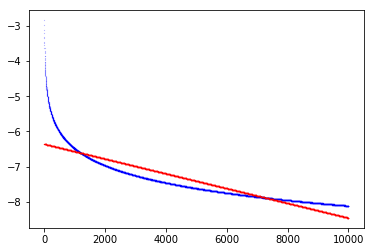

In [8]:
#Метод простых итераций
x_Simple = []
y_Simple = []
x_1 = np.zeros(n)
x_1[1] = 0.1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 10000):
    x_2 = mult(n, IA_size, nnz_Simple, IA_Simple, JA_Simple, AIJ_Simple, x_1)
    x_1 = x_2
    i += 1
    x_Simple.append(i)
    y_Simple.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 10000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Simple, y_Simple, 1)
y_Simple_linear = []
x_Simple_linear = []
for item in x_Simple:
    x_Simple_linear.append(item)
    y_Simple_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
print("Норма матрицы, расчитанная из графика:")
print (math.exp(k[0] / -math.log(0.1)))
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Simple_linear, y_Simple_linear, s = 0.01, c = 'r')
plt.pyplot.show()

Норма отклонения полученного решения(1, 2, 3):
3.2337563495820592e-06
0.0003630025903065913
2.6278348597237863e-05
Не сошелся
Коэффицент наклона:
-0.000866909913439019


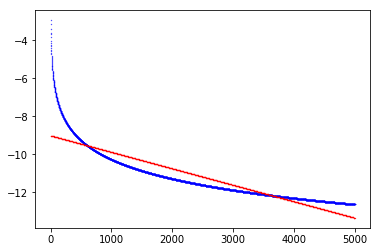

In [9]:
# Метод сопряженных градиентов
x_Gradient = []
y_Gradient = []
x_1 = np.zeros(n)
x_1[1] = 0.1
r_1 = r_2 = mult(n, IA_size, nnz, IA, JA, AIJ, x_1)
s = r_1
i = 0
while (np.linalg.norm(x_1, np.inf) > 0.0000000001 and i < 5000):
    t = mult(n, IA_size, nnz, IA, JA, AIJ, s)
    a = np.matmul(r_1, r_1) / np.matmul(t, s)
    r_2 = r_1 - a * t
    x_1 = x_1 - a * s
    b = np.matmul(r_2, r_2) / np.matmul(r_1, r_1)
    s = r_2 + b * s
    r_1 = r_2
    i += 1
    x_Gradient.append(i)
    y_Gradient.append(math.log(np.linalg.norm(x_1, np.inf)))
#print("Решение:")
#print(x_1)
print("Норма отклонения полученного решения(1, 2, 3):")
print(np.linalg.norm(x_1, np.inf))
print(np.linalg.norm(x_1, 1))
print(np.linalg.norm(x_1))
if i != 5000:
    print("Число итериций:")
    print(i)
else:
    print("Не сошелся")
k = np.polyfit(x_Gradient, y_Gradient, 1)
y_Gradient_linear = []
x_Gradient_linear = []
for item in x_Gradient:
    x_Gradient_linear.append(item)
    y_Gradient_linear.append(item * k[0] + k[1])
print("Коэффицент наклона:")
print (k[0])
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 0.1, c = 'b')
plot = plt.pyplot.scatter(x_Gradient_linear, y_Gradient_linear, s = 0.01, c = 'r')
plt.pyplot.show()

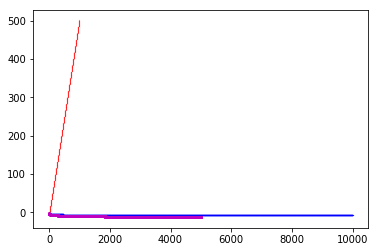

In [14]:
plot = plt.pyplot.scatter(x_Jacobi, y_Jacobi, s = 0.01, c = 'r')
#plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'g')
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 3, c = 'm')
plt.pyplot.show()

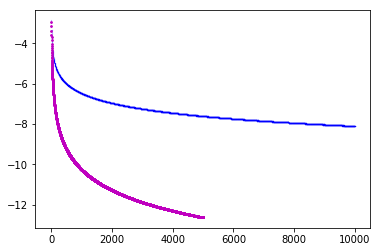

In [15]:
#plot = plt.pyplot.scatter(x_Zeydel, y_Zeydel, s = 0.1, c = 'g')
plot = plt.pyplot.scatter(x_Simple, y_Simple, s = 0.01, c = 'b')
plot = plt.pyplot.scatter(x_Gradient, y_Gradient, s = 3, c = 'm')
plt.pyplot.show()